# Extraindo Insights com Ciência de Dados 

Uma empresa busca uma solução que recomende aos seus consultores a a aprovação ou não do crédito solicitado.<br>
Neste exemplo irei construir um Sistema de Aprovação de Empréstimos com Machine Learning e Programação Python, detalhando cada etapa do processo de construção da sua Máquina Preditiva.

#### Fonte de Dados: Para desenvolver a Máquina Preditiva com Machine Learning, foram fornecidos dados históricos de crédito dos clientes, que estão no arquivo "clientes.csv".
### **Arquitetura dos Dados**
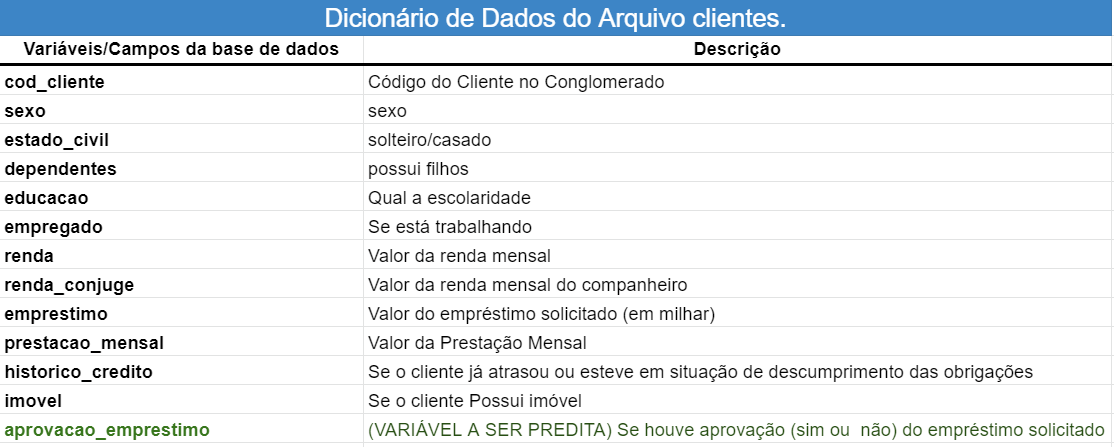

In [87]:
## Pacotes
import pandas as pd     #Biblioteca de Funções de Manipulação de Dados
import seaborn as sns   #Biblioteca de Funções de Visualização Gráfica
import warnings
warnings.filterwarnings("ignore")

#Importação dos Dados
df = pd.read_csv('clientes.csv')

#Verifica as Dimensões do Arquivo e alguns registros
# df.head()
display(df)

,cod_cliente,sexo,estado_civil,dependentes,educacao,empregado,renda,renda_conjuge,emprestimo,prestacao_mensal,historico_credito,imovel,aprovacao_emprestimo
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0,187.0,360.0,1.0,Urban,Y


In [88]:
#Verificando as informações dos campos da tabela de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cod_cliente           614 non-null    object 
 1   sexo                  601 non-null    object 
 2   estado_civil          611 non-null    object 
 3   dependentes           599 non-null    object 
 4   educacao              614 non-null    object 
 5   empregado             582 non-null    object 
 6   renda                 614 non-null    int64  
 7   renda_conjuge         614 non-null    object 
 8   emprestimo            592 non-null    float64
 9   prestacao_mensal      600 non-null    float64
 10  historico_credito     564 non-null    float64
 11  imovel                614 non-null    object 
 12  aprovacao_emprestimo  614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [89]:
#Verifica se há valores Nulos/ausentes
df.isnull().sum()

cod_cliente              0
sexo                    13
estado_civil             3
dependentes             15
educacao                 0
empregado               32
renda                    0
renda_conjuge            0
emprestimo              22
prestacao_mensal        14
historico_credito       50
imovel                   0
aprovacao_emprestimo     0
dtype: int64

In [90]:
#verifica se há valores duplicados
df.duplicated().sum()

0

### Distribuição dos Dados de Cada Variável/Campo

In [91]:
#Estatísticas descritivas das variáveis numéricas
df.describe()

,renda,emprestimo,prestacao_mensal,historico_credito
count,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,146.412162,342.00000,0.842199
std,6109.041673,85.587325,65.12041,0.364878
min,150.000000,9.000000,12.00000,0.000000
25%,2877.500000,100.000000,360.00000,1.000000
50%,3812.500000,128.000000,360.00000,1.000000
75%,5795.000000,168.000000,360.00000,1.000000
max,81000.000000,700.000000,480.00000,1.000000


In [92]:
# Tabela de Frequência da Variável "aprovacao_emprestimo" - Nossa Classe ou Label ou Target ou Y ou Variável a ser Predita (o que a gente quer descobrir)
df.aprovacao_emprestimo.value_counts()

Y    422
N    192
Name: aprovacao_emprestimo, dtype: int64

<AxesSubplot:xlabel='aprovacao_emprestimo', ylabel='count'>

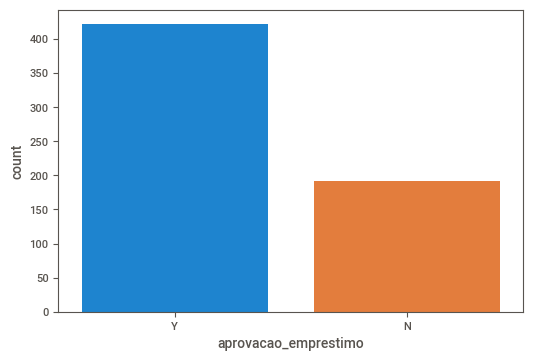

In [93]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(df['aprovacao_emprestimo'])

<AxesSubplot:ylabel='count'>

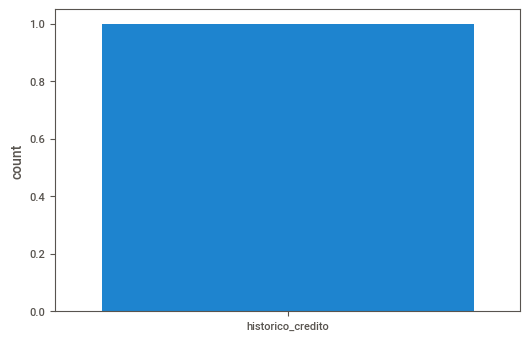

In [94]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(['historico_credito'])

<AxesSubplot:xlabel='educacao', ylabel='count'>

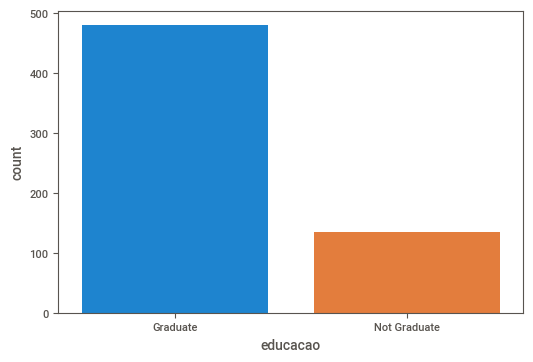

In [95]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(df['educacao'])

<AxesSubplot:xlabel='sexo', ylabel='count'>

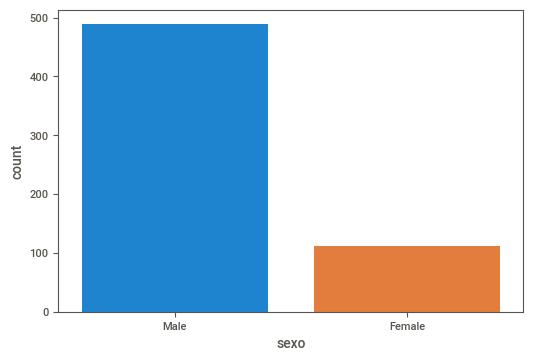

In [96]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(df['sexo'])

<AxesSubplot:xlabel='imovel', ylabel='count'>

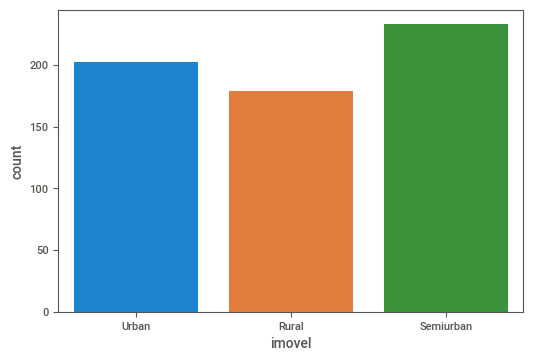

In [97]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(df['imovel'])

<AxesSubplot:xlabel='educacao', ylabel='count'>

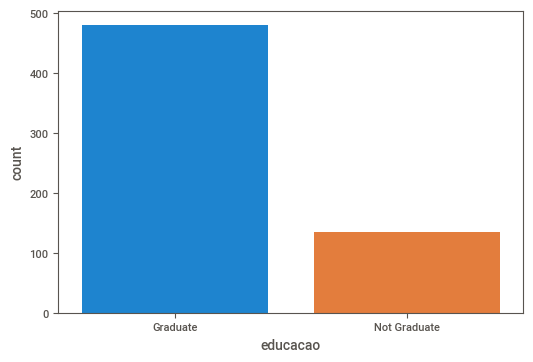

In [98]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(df['educacao'])

<AxesSubplot:xlabel='dependentes', ylabel='count'>

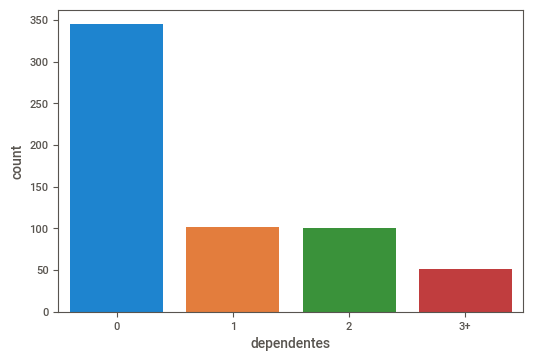

In [99]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(df['dependentes'])

<AxesSubplot:xlabel='estado_civil', ylabel='count'>

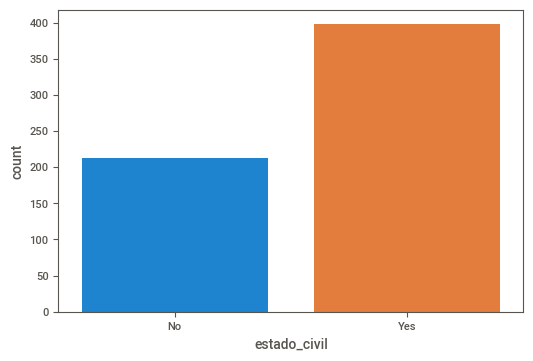

In [100]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(df['estado_civil'])

<AxesSubplot:xlabel='empregado', ylabel='count'>

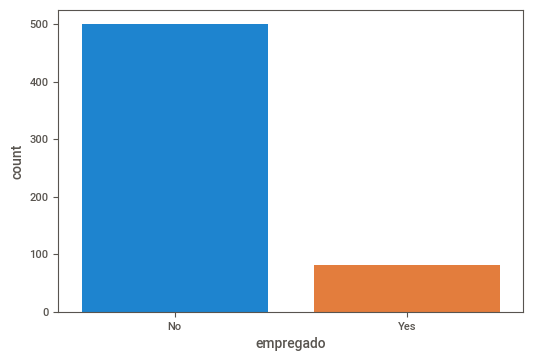

In [101]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(df['empregado'])

<AxesSubplot:xlabel='renda', ylabel='Count'>

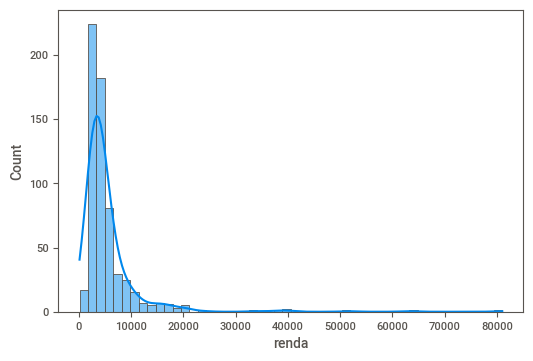

In [102]:
#Criando Gráfico de Distribuição para variáveis contínuas
sns.histplot(df['renda'], bins=50, kde=True)

<AxesSubplot:>

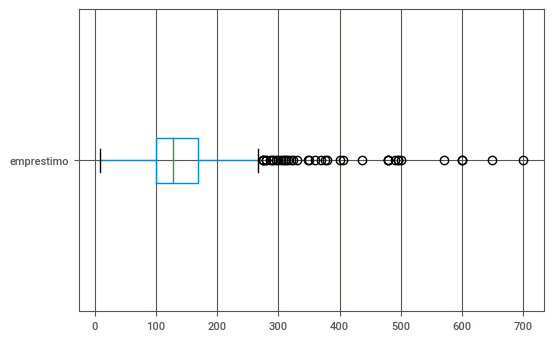

In [103]:
#Distribuição dos dados BOXPLOT
df.boxplot(column='emprestimo',vert=False)

<AxesSubplot:xlabel='emprestimo', ylabel='Count'>

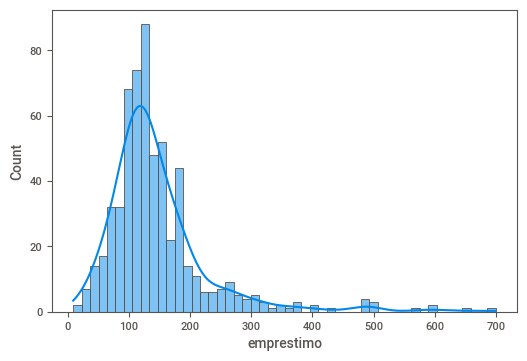

In [104]:
#Criando Gráfico de Distribuição para variáveis contínuas
sns.histplot(df['emprestimo'], bins=50, kde=True)

<AxesSubplot:xlabel='emprestimo', ylabel='renda'>

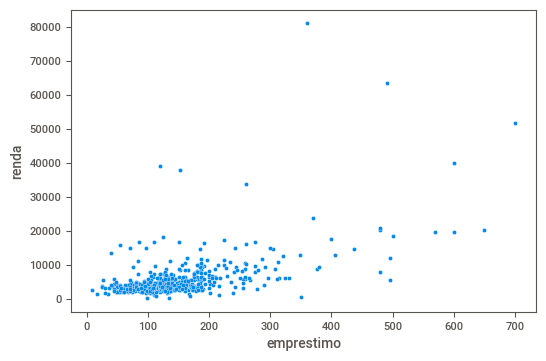

In [105]:
# Correlação entre as Variáveis
sns.scatterplot(data=df, x="emprestimo", y="renda", ) #hue='aprovacao_emprestimo')

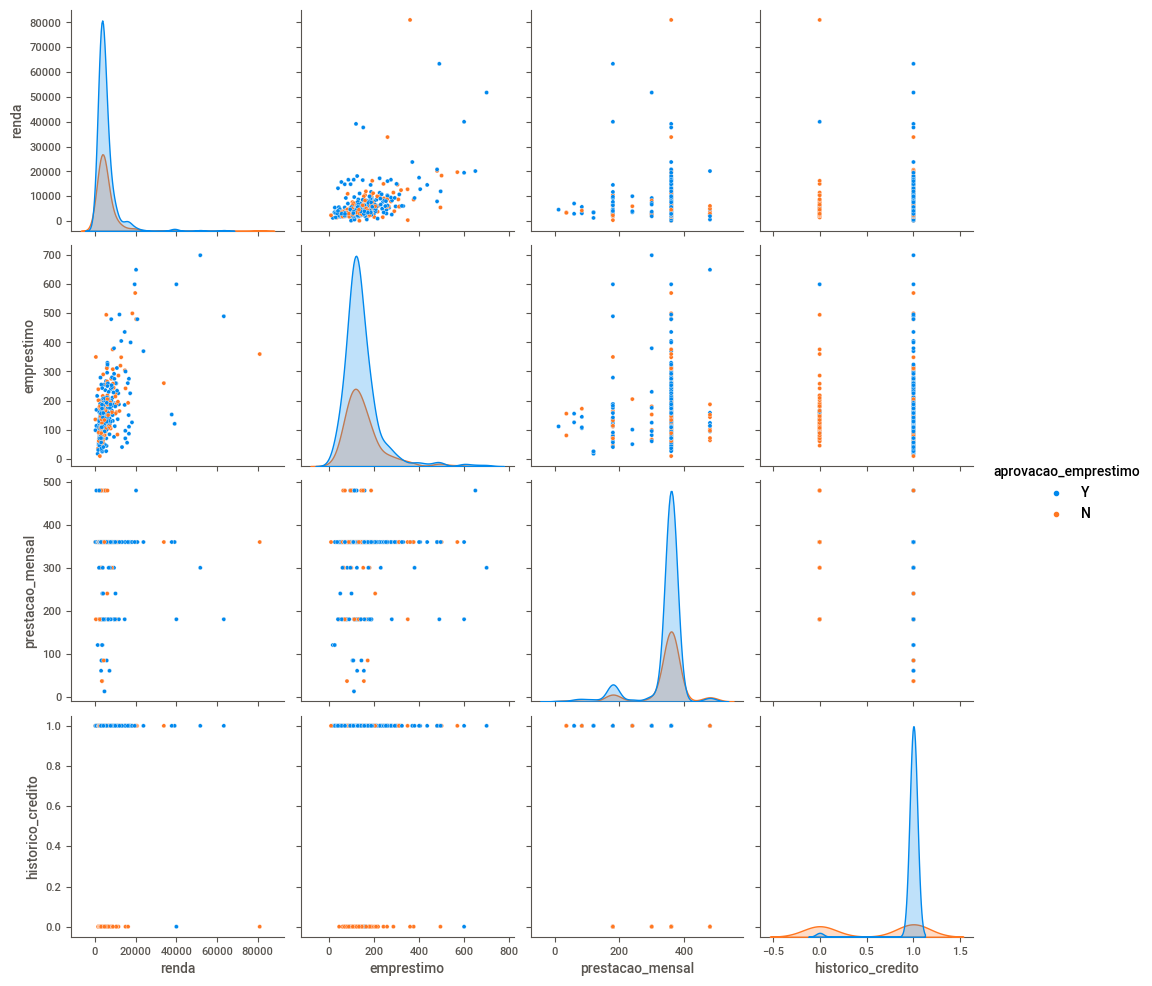

In [106]:
# Criação do Gráfico de dispersão (scatter) conhecido como pairplot
sns.pairplot(df, hue='aprovacao_emprestimo') # kind=reg é a reta de regressão

In [107]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html('clientes.html')

                                             |                                             | [  0%]   00:00 ->…

Report clientes.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Pré-Processamento dos Dados

In [108]:
#Substituindo caracteres por números
df['sexo']= df['sexo'].map({'Male':0, 'Female':1})
df['estado_civil']= df['estado_civil'].map({'No':0, 'Yes':1})
df['aprovacao_emprestimo']= df['aprovacao_emprestimo'].map({'N':0, 'Y':1})

In [109]:
# Eliminando valores Nulos
df = df.dropna()
df.isnull().sum()

cod_cliente             0
sexo                    0
estado_civil            0
dependentes             0
educacao                0
empregado               0
renda                   0
renda_conjuge           0
emprestimo              0
prestacao_mensal        0
historico_credito       0
imovel                  0
aprovacao_emprestimo    0
dtype: int64

In [110]:
# Separando variáveis Explicativas e Variável TARGET
X = df[['sexo', 'estado_civil', 'renda', 'emprestimo', 'historico_credito']]
y = df.aprovacao_emprestimo
X.shape, y.shape

((480, 5), (480,))

In [111]:
# importando Pacote para Amostragem dos Dados
from sklearn.model_selection import train_test_split

In [112]:
# Realizando Amostragem dosa Dados
x_train, x_teste, y_train, y_teste = train_test_split(X,y, test_size = 0.2, random_state = 7)

In [113]:
x_train

,sexo,estado_civil,renda,emprestimo,historico_credito
172,0.0,1.0,3522,81.0,1.0
4,0.0,0.0,6000,141.0,1.0
566,0.0,0.0,3333,70.0,1.0
74,0.0,1.0,5266,187.0,1.0
417,0.0,1.0,1600,239.0,1.0
...,...,...,...,...,...
269,1.0,0.0,2876,90.0,1.0
85,0.0,0.0,2366,136.0,1.0
33,0.0,1.0,3500,114.0,1.0
251,1.0,0.0,3427,138.0,1.0


# Construindo a Máquina Preditiva

### 1° Versão da Máquina Preditiva: Criando um **baseline**

Depois buscar formas de melhorar a assertividade do modelo. 

In [114]:
## Algoritmo Random Forest
from sklearn.ensemble import RandomForestClassifier 
# Criando a Máquina Preditiva com o Random Forest
maquina = RandomForestClassifier() 
maquina.fit(x_train, y_train)

RandomForestClassifier()

In [115]:
#Importando a Métrica de Avaliação
from sklearn.metrics import accuracy_score
#Avaliando a Acurácia da Máquina Preditiva Baseline com os dados de Treino
pred_maquina = maquina.predict(x_train)
accuracy_score(y_train,pred_maquina)

1.0

In [116]:
#Avaliando a Acurácia da Máquina Preditiva Baseline com dados de Teste
pred_maquina = maquina.predict(x_teste)
accuracy_score(y_teste,pred_maquina)


0.7604166666666666

### 2° Versão da Máquina Preditiva: Batendo o Baseline
Utili\ando um hiperparâmetro do algoritimo RANDOM FOREST de nome "max_depth", cujo objetivo é exatamente combater problemas de "Overfiting"

![](https://hackernoon.com/hn-images/1*SBUK2QEfCP-zvJmKm14wGQ.png)

![](https://machinelearningknowledge.ai/wp-content/uploads/2019/05/Overfitting-and-Underfitting-Animation.gif)

![](https://cdn-images-1.medium.com/max/1600/1*vuZxFMi5fODz2OEcpG-S1g.png)

In [117]:
#Criando a Máquina Preditiva com o Random Forest 
maquina = RandomForestClassifier(max_depth=4, random_state = 7) 
maquina.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=7)

In [118]:
#Avaliando a Acurácia da Máquina Preditiva Baseline com os dados de Treino
pred_maquina_treino = maquina.predict(x_train)
accuracy_score(y_train,pred_maquina_treino)

0.8229166666666666

In [119]:
#Avaliando a Acurácia da Máquina Preditiva Baseline com dados de Teste
pred_maquina_teste = maquina.predict(x_teste)
accuracy_score(y_teste,pred_maquina_teste)

0.78125

### Verificando as Variáveis mais importantes

[0.0226187  0.03447823 0.17332143 0.17593175 0.59364989]


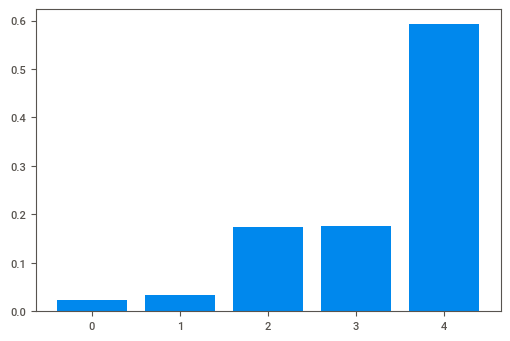

In [120]:
#Importancia das Variáveis
maquina.feature_importances_

#Importancia das Variáveis com Gráfico
print(maquina.feature_importances_)

# plot
from matplotlib import pyplot
pyplot.bar(range(len(maquina.feature_importances_)), maquina.feature_importances_)
pyplot.show()

In [121]:
#Comando de Salvamento da Máquina Preditiva
import pickle 
pickle_out = open("maquina_preditiva.pkl", mode = "wb") 
pickle.dump(maquina, pickle_out) 
pickle_out.close()

# Deploy - Implementando a Maquina Preditiva na WEB

In [2]:
#instalação do Pacote para Conexão do Sistema na WEB 
!pip install -q pyngrok
!pip install -q streamlit --user
!pip install -q streamlit_ace --user


##  Criando o Sistema 

In [3]:
#Comando para Criar o Sistema no arquivo app.py
# %%writefile app.py


#Importando Pacotes 
import pickle
import streamlit as st
 
# Carregando a Máquina Preditiva
pickle_in = open('maquina_preditiva.pkl', 'rb') 
maquina_preditiva = pickle.load(pickle_in)

#Manter a sessão em cache 
@st.cache()
  
# Criando a função que irá fazer a predição usando os dados impostados pelo usuário do Sistema 
def prediction(sexo, estado_civil, renda, emprestimo, historico_credito):   
 
    # Pre-processando a entrada do Usuário    
    if sexo == "Masculino":
        sexo = 0
    else:
        sexo = 1
 
    if estado_civil == "Solteiro(a)":
        estado_civil = 0
    else:
        estado_civil = 1
 
    if historico_credito == "Débitos Pendentes":
        historico_credito = 0
    else:
        historico_credito = 1  
 
    emprestimo = emprestimo / 1000
 
    # Fazendo Predições
    prediction = maquina_preditiva.predict( 
        [[sexo, estado_civil, renda, emprestimo, historico_credito]])
     
    if prediction == 0:
        pred = 'Rejeitado'
    else:
        pred = 'Aprovado'
    return pred
      
  
# Essa função é para criação da webpage  
def main():  

    # Elementos da webpage
    # Nesse Ponto vc deve Personalizar o Sistema com sua Marca
    html_temp = """ 
    <div style ="background-color:blue;padding:13px"> 
    <h1 style ="color:white;text-align:center;">SAE</h1> 
    <h2 style ="color:white;text-align:center;">Sistema de Aprovação de Empréstimos - by Edu</h2> 
    </div> 
    """
      
    # Função do stramlit que faz o display da webpage
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # As linhas abaixo criam as caixas na qual o usuário vai entrar com dados da pessoa que quer o empréstimo para fazer a Predição
    sexo = st.selectbox('Sexo',("Masculino","Feminino"))
    estado_civil = st.selectbox('Estado Civil',("Solteiro(a)","Casado(a)")) 
    renda = st.number_input("Renda Mensal") 
    emprestimo = st.number_input("Valor Total do Empréstimo")
    historico_credito = st.selectbox('Histórico de Créditos',("Sem Débitos","Débitos Pendentes"))
    result =""
      
    #Quando o Usuário clicar no botão "Verificar" a Máquina Preditiva faz seu trabalho
    if st.button("Verificar"): 
        result = prediction(sexo, estado_civil, renda, emprestimo, historico_credito) 
        st.success('O empréstimo foi {}'.format(result))
        print(emprestimo)
     
# if __name__=='__main__': 
#     main()


In [ ]:
!pip install bottle

from bottle import route, run, template

@route('/hello/world')
def index(name):
    return template('<b>Hello {{name}}</b>!', name=name)

run(host='localhost', port=8080)

Bottle v0.12.19 server starting up (using WSGIRefServer())...
Listening on http://localhost:8080/
Hit Ctrl-C to quit.

127.0.0.1 - - [27/Oct/2021 09:36:41] "GET /hello HTTP/1.1" 404 730
127.0.0.1 - - [27/Oct/2021 09:36:41] "GET /favicon.ico HTTP/1.1" 404 742
127.0.0.1 - - [27/Oct/2021 09:39:25] "GET /hello/world HTTP/1.1" 200 19
